In [1]:
import os
from os import path
import shutil
import operator
import matplotlib.pyplot as plt
import random
import glob
import pretty_midi
import numpy as np
import joblib
%matplotlib inline
import seaborn as sns
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5)
import matplotlib.gridspec
import collections
# plotting.py contains utility functions for making nice histogram plots
import plotting_py as plotting


In [2]:
Destination = r'D:\UNC\2021 Spring\Musical Similarity\Lakh\genre_500_pop20'

# Measuring Statistics

In [3]:
def compute_statistics(midi_file):
    """
    Given a path to a MIDI file, compute a dictionary of statistics about it
    
    Parameters
    ----------
    midi_file : str
        Path to a MIDI file.
    
    Returns
    -------
    statistics : dict
        Dictionary reporting the values for different events in the file.
    """
    # Some MIDI files will raise Exceptions on loading, if they are invalid.
    # We just skip those.
    try:
        pm = pretty_midi.PrettyMIDI(midi_file)
        # Extract informative events from the MIDI file
        return {'n_instruments': len(pm.instruments),
                'program_numbers': [i.program for i in pm.instruments if not i.is_drum],
                'key_numbers': [k.key_number for k in pm.key_signature_changes],
                'tempos': list(pm.get_tempo_changes()[1]),
                'time_signature_changes': pm.time_signature_changes,
                'end_time': pm.get_end_time(),
                'lyrics': [l.text for l in pm.lyrics]}
    # Silently ignore exceptions for a clean presentation (sorry Python!)
    except Exception as e:
        pass


In [4]:
# Compute statistics about every file in our collection in parallel using joblib
# We do things in parallel because there are tons so it would otherwise take too long!
statistics = joblib.Parallel(n_jobs=10, verbose=0)(
    joblib.delayed(compute_statistics)(midi_file)
    for midi_file in glob.glob(os.path.join(Destination, '*.mid')))
# When an error occurred, None will be returned; filter those out.
statistics = [s for s in statistics if s is not None]

# Length

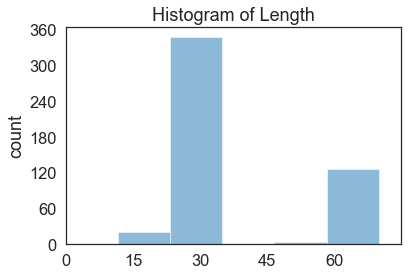

In [5]:
import numpy as np
import math
length = []
for s in statistics:
    length.append(s['end_time'])
bins = np.linspace(min(length), 
                   max(length),
                   6)
plt.xlim([min(length)-5, max(length)+5])
plt.hist(length, bins=bins, alpha = 0.5)
plt.title('Histogram of Length')
plt.ylabel('count')
plt.xticks(np.arange(0,65, 15))
plt.yticks(np.arange(0,370,60))
plt.show()

#print(sum(length)/3600)

# Number of Instruments

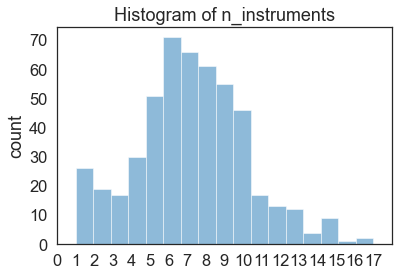

In [6]:
n_instruments = []
for s in statistics:
    n_instruments.append(s['n_instruments'])
bins = np.linspace(math.ceil(min(n_instruments)), 
                   math.floor(max(n_instruments)),
                   18)
plt.xlim([min(n_instruments)-1, max(n_instruments)+1])
plt.hist(n_instruments, bins=bins, alpha = 0.5)
plt.title('Histogram of n_instruments')
plt.ylabel('count')
plt.xticks(np.arange(0,18,1))
plt.yticks(np.arange(0,80,10))
plt.show()

# Program Numbers

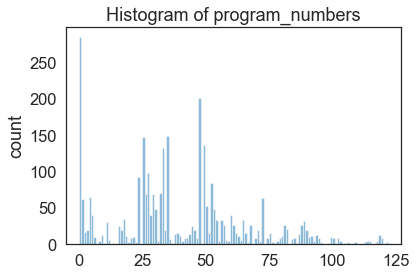

In [7]:
program_numbers = []
for s in statistics:
    for i in s['program_numbers']:
        program_numbers.append(i)
bins = np.linspace(math.ceil(min(program_numbers)), 
                   math.floor(max(program_numbers)),
                   128)
plt.xlim([min(program_numbers)-5, max(program_numbers)+5])
plt.hist(program_numbers, bins=bins, alpha = 0.5)
plt.title('Histogram of program_numbers')
plt.ylabel('count')
plt.show()

# Tempos

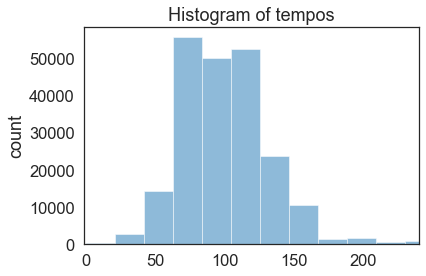

In [8]:
tempos = []
for s in statistics:
    for i in s['tempos']:
        tempos.append(i)
bins = np.linspace(0, 
                   480,
                   24)
plt.xlim([min(tempos)-5, 240])
plt.hist(tempos, bins=bins, alpha = 0.5)
plt.title('Histogram of tempos')
plt.ylabel('count')
plt.yticks(np.arange(0,60000,10000))
plt.show()

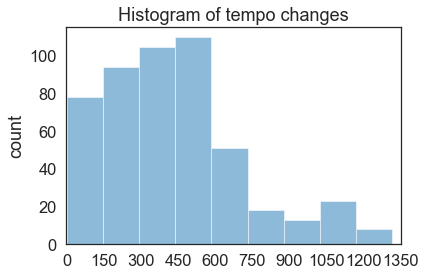

In [17]:
tempo_change = []
for s in statistics:
    tempo_change.append(len(s['tempos']))
                        
bins = np.linspace(min(tempo_change), max(tempo_change), 10)
plt.xlim([min(tempo_change)-5, max(tempo_change)+5])
plt.hist(tempo_change, bins=bins, alpha = 0.5)
plt.xticks(np.arange(0,1500,150))
plt.title('Histogram of tempo changes')
plt.ylabel('count')
plt.show()